# Exercício

1. Você recebeu duas bases de dados: JORGE_PROCESSADO e BRUNO_PROCESSADO. Crie um dataframe chamado "jorge" e outro chamado "bruno" para cada dataset.

In [6]:
import pandas as pd

df_jorge=pd.read_csv('JORGE_PROCESSADO.csv', sep=';')
df_jorge.head()

,DT_PUBLICACAO,TEXTO,N_CURTIDAS,LINK_PUBLICACAO,N_COMENTARIOS,DATA_DOWNLOAD
0,2024-08-24,Mundo Pixa,17,https://www.instagram.com/p/C_ETYtGx7mV/,1,2024-09-07
1,2024-06-22,Esse gosta de aventuras!,17,https://www.instagram.com/reel/C8iZ3rWOIuo/,1,2024-09-07
2,2024-05-24,Linda do papai,30,https://www.instagram.com/reel/C7WC5a2g_kc/,2,2024-09-07
3,2024-05-24,NaN,30,https://www.instagram.com/p/C0kmTN_rB9nFfC8m90...,2,2024-09-07
4,2023-08-20,A mocinha que o papai ama ❤️,42,https://www.instagram.com/p/CwLtqZMrvmv/,4,2024-09-07


In [7]:
df_bruno=pd.read_csv('BRUNO_PROCESSADO.csv', sep=';')
df_bruno.head()

,DT_PUBLICACAO,TEXTO,N_CURTIDAS,LINK_PUBLICACAO,N_COMENTARIOS,DATA_DOWNLOAD
0,2024-09-07,🗓️ PROGRAMAÇÃO 1°DIA (09/09) \n\nConfira o que...,34.0,https://www.instagram.com/p/C_n9IXAuPAk/,4.0,2024-09-08
1,2024-09-05,Novo pós-doutorado começando! ✨⭐🌟\n\nRecebi da...,117.0,https://www.instagram.com/p/C_jK0NVx6Pt/,20.0,2024-09-08
2,2024-09-01,A homenagem mais bonita que recebi nessa vida ...,95.0,https://www.instagram.com/p/C_X3aT-RPvJ/,23.0,2024-09-08
3,2024-08-29,O primeiro episódio do Sapiência está no ar e ...,24.0,https://www.instagram.com/reel/C_QRJ2QOlCk/,6.0,2024-09-08
4,2024-08-26,"Vem aí a primeira temporada do Sapiência, um v...",30.0,https://www.instagram.com/reel/C_JJzllRMGY/,1.0,2024-09-08


In [8]:
df_jorge['nome']='JORGE'
df_bruno['nome']='BRUNO'
df = pd.concat([df_jorge, df_bruno])

2. Para cada dataset, crie um gráfico representando a série temporal de publicações mensais para cada indivíduo. 

In [11]:
df_jorge['DT_PUBLICACAO'] = pd.to_datetime(df_jorge['DT_PUBLICACAO'])
df_bruno['DT_PUBLICACAO'] = pd.to_datetime(df_bruno['DT_PUBLICACAO'])

df_jorge['MES'] = df_jorge['DT_PUBLICACAO'].dt.month
df_bruno['MES'] = df_bruno['DT_PUBLICACAO'].dt.month

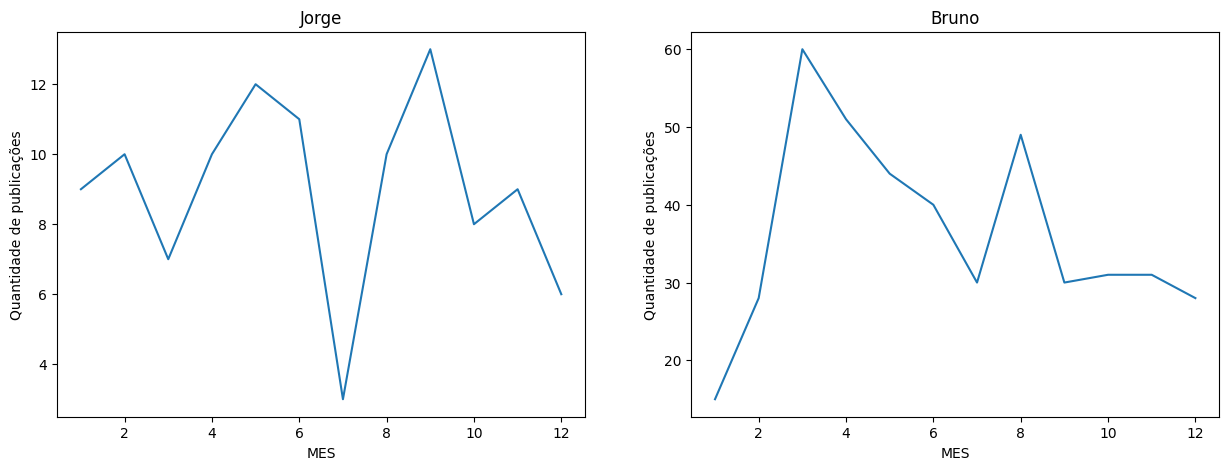

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
df_jorge['MES'].value_counts().sort_index().plot(ax=ax[0], title='Jorge', ylabel='Quantidade de publicações')
df_bruno['MES'].value_counts().sort_index().plot(ax=ax[1], title='Bruno', ylabel='Quantidade de publicações')
plt.show()

3. Para cada dataset, crie graficos de barras para as seguintes métricas: 

    a. Número de publicações. 
    
    b. Média de curtidas por publicações. 
    
    c. Média de palavras por publicações. 
    
    d. Média de comentário por publicações. 
    
    e. Word cloud

In [13]:
df['N_PALAVRAS'] = df['TEXTO'].str.split().apply(str).apply(len)

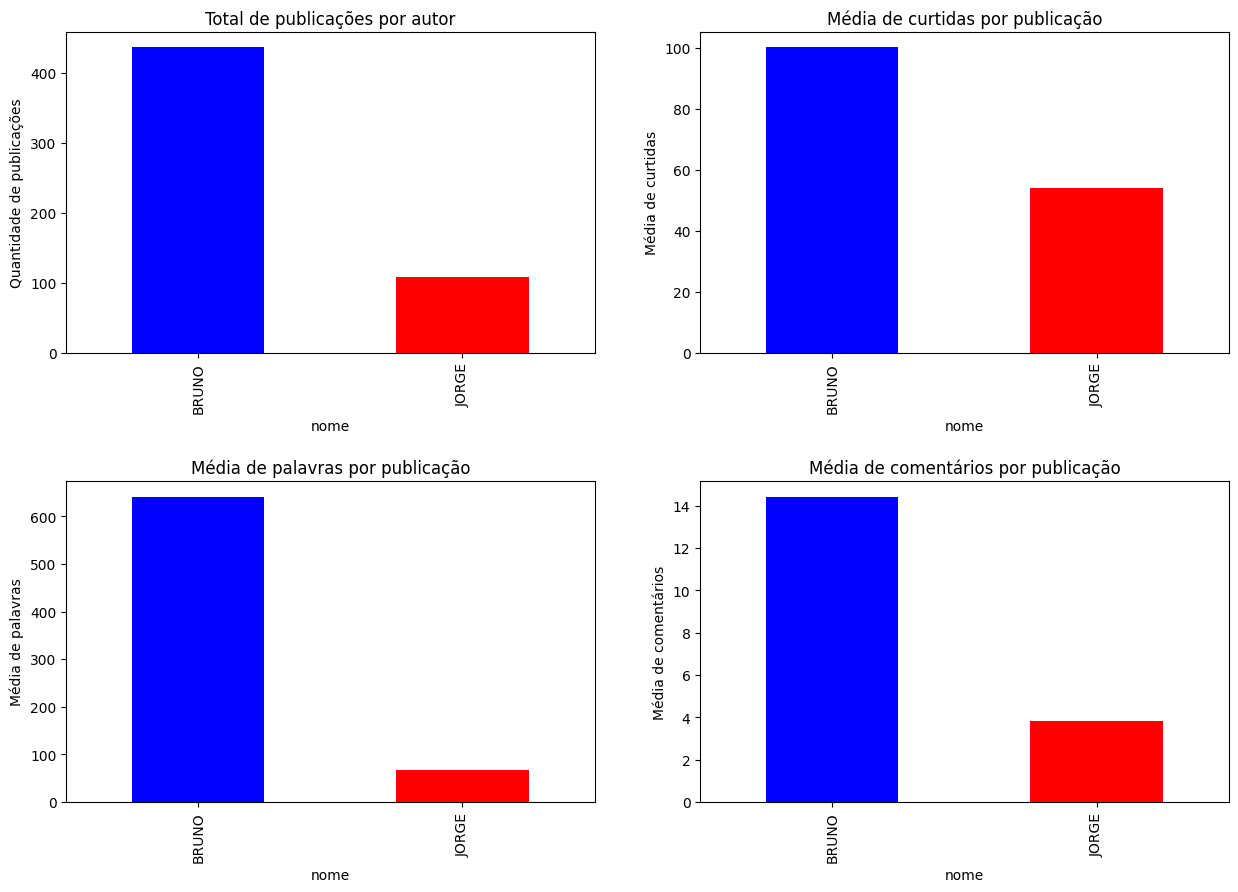

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))  # Aumentei a altura da figura para 10
df['nome'].value_counts().plot(kind='bar', ax=ax[0][0], title='Total de publicações por autor', ylabel='Quantidade de publicações', color=['blue', 'red'])
df.groupby('nome')['N_CURTIDAS'].mean().plot(kind='bar', ax=ax[0][1], title='Média de curtidas por publicação', ylabel='Média de curtidas', color=['blue', 'red'])
df.groupby('nome')['N_PALAVRAS'].mean().plot(kind='bar', ax=ax[1][0], title='Média de palavras por publicação', ylabel='Média de palavras', color=['blue', 'red'])
df.groupby('nome')['N_COMENTARIOS'].mean().plot(kind='bar', ax=ax[1][1], title='Média de comentários por publicação', ylabel='Média de comentários', color=['blue', 'red'])
plt.subplots_adjust(hspace=0.4)  # Ajuste do espaço vertical entre os subplots
plt.show()


4. Utilize o tsne para representar os textos do BRUNO e do JORGE em um espaço bidimensional.

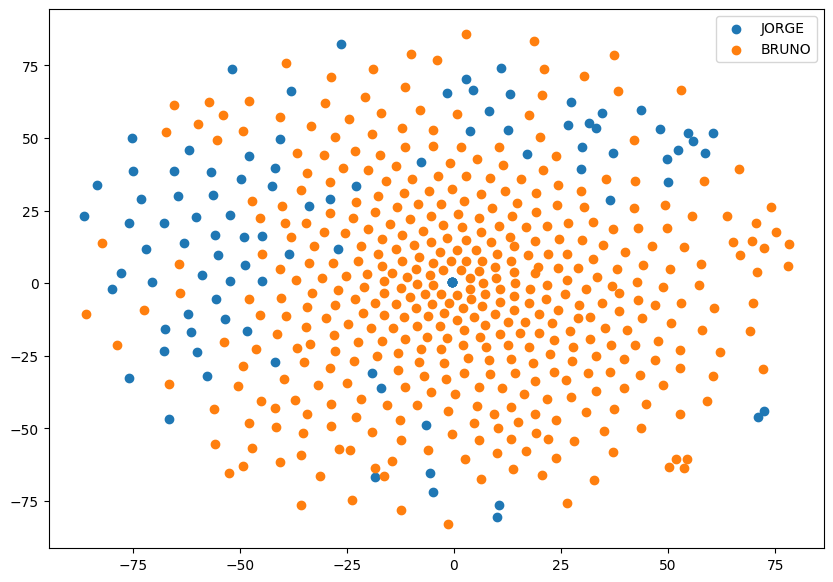

In [15]:
# 4. Utilize o tsne para representar os textos do BRUNO e do JORGE em um espaço bidimensional.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

# remove nan values
df = df.dropna(subset=['TEXTO'])
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['TEXTO'])
X = X.toarray()

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

fig, ax = plt.subplots(figsize=(10, 7))
for nome in df['nome'].unique():
    mask = df['nome'] == nome
    ax.scatter(X_tsne[mask, 0], X_tsne[mask, 1], label=nome)
ax.legend()
plt.show()

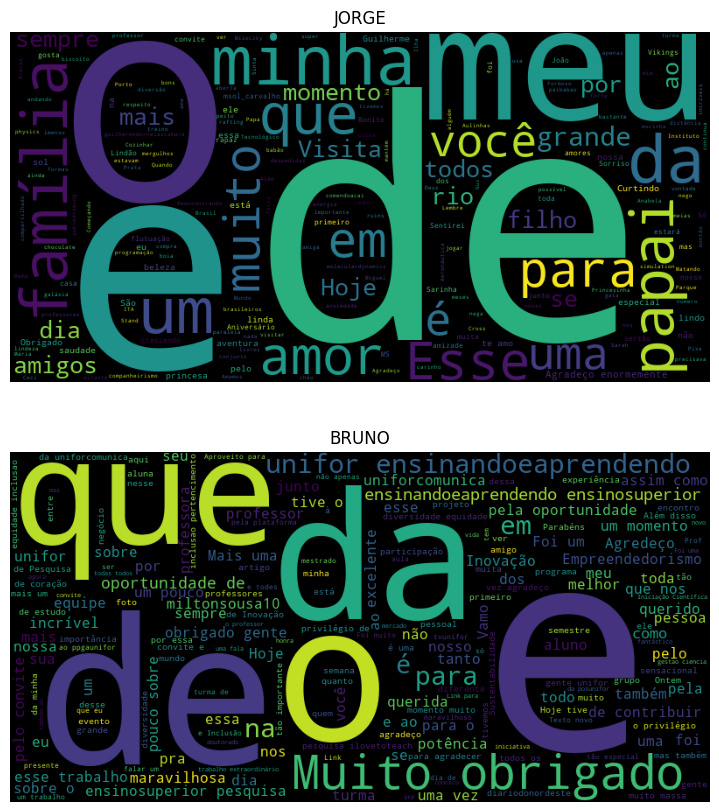

In [16]:
# wordcloud
from wordcloud import WordCloud

fig, ax = plt.subplots(2, 1, figsize=(15, 10))
for i, nome in enumerate(df['nome'].unique()):
    mask = df['nome'] == nome
    text = ' '.join(df[mask]['TEXTO'])
    wordcloud = WordCloud(width=800, height=400).generate(text)
    ax[i].imshow(wordcloud)
    ax[i].set_title(nome)
    ax[i].axis('off')
plt.show()

5. Utilizando o dado de sentimentos (BASE_PROCESSED.csv), verifique a distribuição de sentimentos para cada dataset. Represente em um gráfico de barras. 

In [17]:
sentimentos=pd.read_csv('BASE_PROCESSED.csv',sep=';')
sentimentos

,TEXTO,sentimento
0,este trabalho e agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você e,alegria
...,...,...
761,acho que isso e defeituoso,tristeza
762,os remedios me derrubam na cama,tristeza
763,a depressão vai me derrubar,tristeza
764,suas desculpas são falsas,tristeza


In [18]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('distiluse-base-multilingual-cased-v2')

matriz=model.encode(sentimentos.TEXTO.values)
y=sentimentos['sentimento'].values

6. Crie um modelo de IA que, dado um texto de entrada, ele classifica o texto em "BRUNO" ou "JORGE". Qual é o acurácia do seu modelo? Onde o modelo erra mais? Crie uma matriz de confusão. 